# Sentiment Analysis

In [ ]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the NLTK stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pip install transformers

In [ ]:
df = pd.read_csv('dataset_mcd_tweet_en.csv')
df

,text,username,url,tweet_id,likes,replies,retweets
0,There is a campaign to boycott McDonald’s for ...,@KarinKMacDee,https://twitter.com/KarinKMacDee/status/172150...,1721504983776915593,1,0,0
1,"In fast food news, I’ve decided to boycott McD...",@BigBearF1,https://twitter.com/BigBearF1/status/172148097...,1721480970228920454,54,4,2
2,yeah you should boycott McDonald and coke what...,@ahmedma80198515,https://twitter.com/ahmedma80198515/status/172...,1721488032690254070,1,0,0
3,How addicted to trash do you have to be to not...,@_abdurrahmaan_,https://twitter.com/_abdurrahmaan_/status/1720...,1720410859153854513,590,3,163
4,Lol at this mujeet please saaaar boycott McDon...,@rakeshp93001401,https://twitter.com/rakeshp93001401/status/172...,1721466469056159956,1,0,0
...,...,...,...,...,...,...,...
108,"Anas tipu ap che hein kia, ask your precious c...",@na_khuda_,https://twitter.com/na_khuda_/status/172067002...,1720670025881936138,1,0,0
109,McDonald's support Israel.\nIsrael kills innoc...,@yoamafia,https://twitter.com/yoamafia/status/1720660240...,1720660240314802182,0,0,0
110,A reminder before you boycott McDonald's check...,@3luegrey,https://twitter.com/3luegrey/status/1720449083...,1720449083293171758,6,1,4
111,I'd still boycott McDonald's even if they didn...,@SalviSatan666,https://twitter.com/SalviSatan666/status/17206...,1720637546865324136,1,0,0


In [ ]:
# Function to preprocess a single tweet
def preprocess_tweet(tweet):
    # Remove punctuation and convert to lowercase
    tweet = ''.join([char for char in tweet if char not in string.punctuation])
    tweet = tweet.lower()

    # Tokenization and lemmatization using spaCy
    tokens = nlp(tweet)
    lemmatized_tokens = [token.lemma_ for token in tokens if token.text not in stop_words]

    return ' '.join(lemmatized_tokens)

In [ ]:
# Apply the preprocessing function to the "text_tweet" column
df['preprocessed_tweet'] = df['text'].apply(preprocess_tweet)
df

,text,username,url,tweet_id,likes,replies,retweets,preprocessed_tweet
0,There is a campaign to boycott McDonald’s for ...,@KarinKMacDee,https://twitter.com/KarinKMacDee/status/172150...,1721504983776915593,1,0,0,campaign boycott mcdonald ’s support israel wa...
1,"In fast food news, I’ve decided to boycott McD...",@BigBearF1,https://twitter.com/BigBearF1/status/172148097...,1721480970228920454,54,4,2,fast food news ’ve decide boycott mcdonald ’s ...
2,yeah you should boycott McDonald and coke what...,@ahmedma80198515,https://twitter.com/ahmedma80198515/status/172...,1721488032690254070,1,0,0,yeah boycott mcdonald coke problem
3,How addicted to trash do you have to be to not...,@_abdurrahmaan_,https://twitter.com/_abdurrahmaan_/status/1720...,1720410859153854513,590,3,163,addict trash able boycott mcdonald
4,Lol at this mujeet please saaaar boycott McDon...,@rakeshp93001401,https://twitter.com/rakeshp93001401/status/172...,1721466469056159956,1,0,0,lol mujeet please saaaar boycott mcdonald ’s p...
...,...,...,...,...,...,...,...,...
108,"Anas tipu ap che hein kia, ask your precious c...",@na_khuda_,https://twitter.com/na_khuda_/status/172067002...,1720670025881936138,1,0,0,anas tipu ap che hein kia ask precious company...
109,McDonald's support Israel.\nIsrael kills innoc...,@yoamafia,https://twitter.com/yoamafia/status/1720660240...,1720660240314802182,0,0,0,mcdonald support israel \n israel kill innocen...
110,A reminder before you boycott McDonald's check...,@3luegrey,https://twitter.com/3luegrey/status/1720449083...,1720449083293171758,6,1,4,reminder boycott mcdonald check mc donald bran...
111,I'd still boycott McDonald's even if they didn...,@SalviSatan666,https://twitter.com/SalviSatan666/status/17206...,1720637546865324136,1,0,0,still boycott mcdonald even not support israel


In [ ]:
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# Define a function to predict sentiment and add results to separate columns
def predict_sentiment(text):
    results = distilled_student_sentiment_classifier(text)
    if results:
        # Find the result with the highest score
        max_result = max(results[0], key=lambda x: x['score'])
        sentiment_label = max_result['label']
        sentiment_score = max_result['score']
    else:
        sentiment_label = None
        sentiment_score = None
    return sentiment_label, sentiment_score

In [ ]:
# Apply the predict_sentiment function to the "preprocessed_tweet" column
df['sentiment_label'], df['sentiment_score'] = zip(*df['preprocessed_tweet'].apply(predict_sentiment))
df

,text,username,url,tweet_id,likes,replies,retweets,preprocessed_tweet,sentiment_label,sentiment_score
0,There is a campaign to boycott McDonald’s for ...,@KarinKMacDee,https://twitter.com/KarinKMacDee/status/172150...,1721504983776915593,1,0,0,campaign boycott mcdonald ’s support israel wa...,negative,0.742763
1,"In fast food news, I’ve decided to boycott McD...",@BigBearF1,https://twitter.com/BigBearF1/status/172148097...,1721480970228920454,54,4,2,fast food news ’ve decide boycott mcdonald ’s ...,negative,0.441489
2,yeah you should boycott McDonald and coke what...,@ahmedma80198515,https://twitter.com/ahmedma80198515/status/172...,1721488032690254070,1,0,0,yeah boycott mcdonald coke problem,negative,0.624179
3,How addicted to trash do you have to be to not...,@_abdurrahmaan_,https://twitter.com/_abdurrahmaan_/status/1720...,1720410859153854513,590,3,163,addict trash able boycott mcdonald,negative,0.524032
4,Lol at this mujeet please saaaar boycott McDon...,@rakeshp93001401,https://twitter.com/rakeshp93001401/status/172...,1721466469056159956,1,0,0,lol mujeet please saaaar boycott mcdonald ’s p...,positive,0.487357
...,...,...,...,...,...,...,...,...,...,...
108,"Anas tipu ap che hein kia, ask your precious c...",@na_khuda_,https://twitter.com/na_khuda_/status/172067002...,1720670025881936138,1,0,0,anas tipu ap che hein kia ask precious company...,positive,0.542224
109,McDonald's support Israel.\nIsrael kills innoc...,@yoamafia,https://twitter.com/yoamafia/status/1720660240...,1720660240314802182,0,0,0,mcdonald support israel \n israel kill innocen...,negative,0.630464
110,A reminder before you boycott McDonald's check...,@3luegrey,https://twitter.com/3luegrey/status/1720449083...,1720449083293171758,6,1,4,reminder boycott mcdonald check mc donald bran...,negative,0.480494
111,I'd still boycott McDonald's even if they didn...,@SalviSatan666,https://twitter.com/SalviSatan666/status/17206...,1720637546865324136,1,0,0,still boycott mcdonald even not support israel,negative,0.647427


# Data Visualization

In [ ]:
label_data = pd.DataFrame(df.sentiment_label.value_counts()).reset_index()
label_data.rename(columns={'index': 'sentiment_label', 'sentiment_label':'count'}, inplace=True)
label_data

,sentiment_label,count
0,negative,87
1,positive,24
2,neutral,2


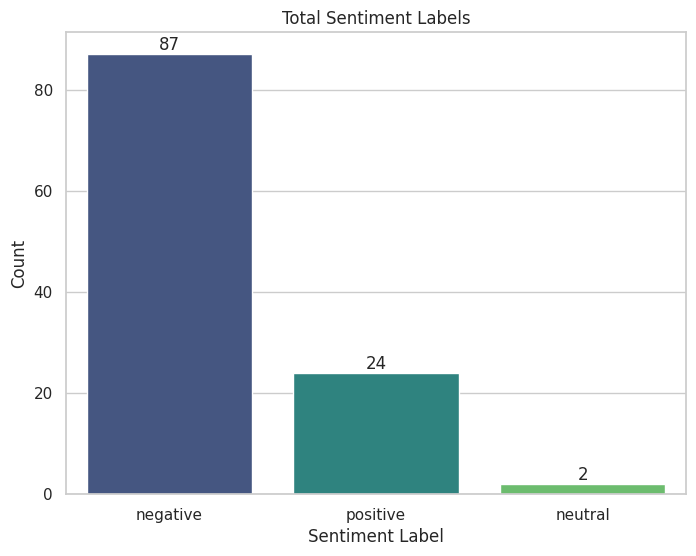

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x="sentiment_label", y="count", data=label_data, palette="viridis")
plt.title("Total Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")

# Add labels to the bars
for index, row in label_data.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.show()

## WordCloud

In [ ]:
negative_result_df = df[df['sentiment_label']=='negative'].reset_index(drop=True)
positive_result_df = df[df['sentiment_label']=='positive'].reset_index(drop=True)
neutral_result_df = df[df['sentiment_label']=='neutral'].reset_index(drop=True)

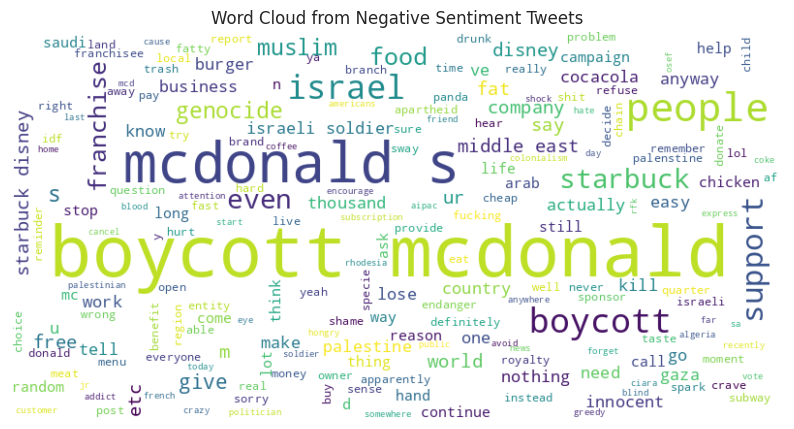

In [ ]:
# Join all preprocessed tweets into a single string
text_data = ' '.join(negative_result_df['preprocessed_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Negative Sentiment Tweets")
plt.show()

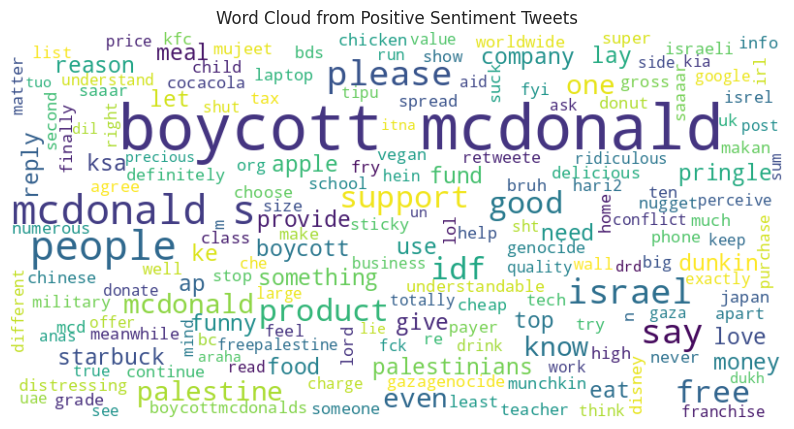

In [ ]:
# Join all preprocessed tweets into a single string
text_data = ' '.join(positive_result_df['preprocessed_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Positive Sentiment Tweets")
plt.show()

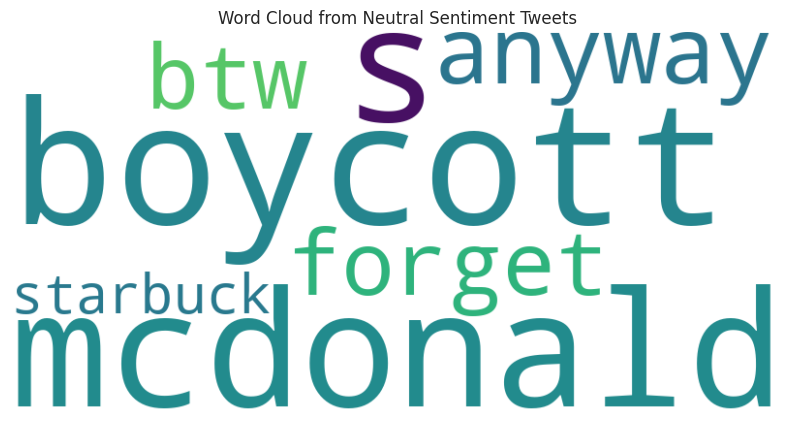

In [ ]:
# Join all preprocessed tweets into a single string
text_data = ' '.join(neutral_result_df['preprocessed_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Neutral Sentiment Tweets")
plt.show()

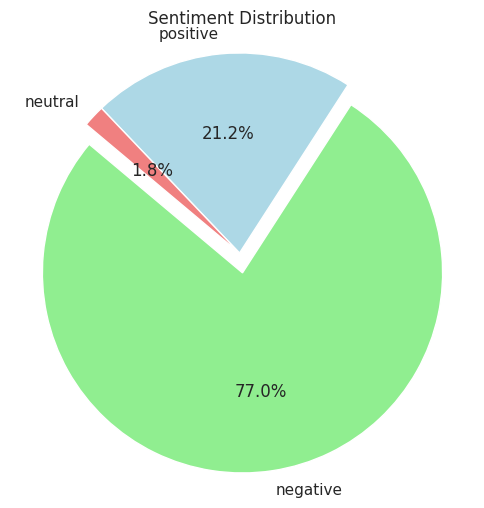

In [ ]:
# Create a Sentiment Pie Chart
plt.figure(figsize=(6, 6))
colors = ['lightgreen', 'lightblue', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the 1st slice (positive)

plt.pie(label_data['count'], labels=label_data['sentiment_label'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title("Sentiment Distribution")

plt.show()

# Emotion Classification

In [ ]:
from transformers import pipeline

emotion_classifier = pipeline("text-classification", model="thoriqfy/indobert-emotion-classification")


In [ ]:
# Define a function to predict emotion label and add results to separate columns
def predict_emotion(text):
    results = emotion_classifier(text)
    if results:
        emotion_label = results[0]['label']
        emotion_label_score = results[0]['score']
    else:
        emotion_label = None
        emotion_label_score = None
    return emotion_label, emotion_label_score

In [ ]:
# Apply the predict_emotion function to the "preprocessed_tweet" column
df['emotion_label'], df['emotion_label_score'] = zip(*df['preprocessed_tweet'].apply(predict_emotion))
df

,text,username,url,tweet_id,likes,replies,retweets,preprocessed_tweet,sentiment_label,sentiment_score,emotion_label,emotion_label_score
0,There is a campaign to boycott McDonald’s for ...,@KarinKMacDee,https://twitter.com/KarinKMacDee/status/172150...,1721504983776915593,1,0,0,campaign boycott mcdonald ’s support israel wa...,negative,0.742763,Neutral,0.992249
1,"In fast food news, I’ve decided to boycott McD...",@BigBearF1,https://twitter.com/BigBearF1/status/172148097...,1721480970228920454,54,4,2,fast food news ’ve decide boycott mcdonald ’s ...,negative,0.441489,Neutral,0.977414
2,yeah you should boycott McDonald and coke what...,@ahmedma80198515,https://twitter.com/ahmedma80198515/status/172...,1721488032690254070,1,0,0,yeah boycott mcdonald coke problem,negative,0.624179,Neutral,0.606945
3,How addicted to trash do you have to be to not...,@_abdurrahmaan_,https://twitter.com/_abdurrahmaan_/status/1720...,1720410859153854513,590,3,163,addict trash able boycott mcdonald,negative,0.524032,Neutral,0.950870
4,Lol at this mujeet please saaaar boycott McDon...,@rakeshp93001401,https://twitter.com/rakeshp93001401/status/172...,1721466469056159956,1,0,0,lol mujeet please saaaar boycott mcdonald ’s p...,positive,0.487357,Neutral,0.918308
...,...,...,...,...,...,...,...,...,...,...,...,...
108,"Anas tipu ap che hein kia, ask your precious c...",@na_khuda_,https://twitter.com/na_khuda_/status/172067002...,1720670025881936138,1,0,0,anas tipu ap che hein kia ask precious company...,positive,0.542224,Neutral,0.995673
109,McDonald's support Israel.\nIsrael kills innoc...,@yoamafia,https://twitter.com/yoamafia/status/1720660240...,1720660240314802182,0,0,0,mcdonald support israel \n israel kill innocen...,negative,0.630464,Neutral,0.968097
110,A reminder before you boycott McDonald's check...,@3luegrey,https://twitter.com/3luegrey/status/1720449083...,1720449083293171758,6,1,4,reminder boycott mcdonald check mc donald bran...,negative,0.480494,Neutral,0.996691
111,I'd still boycott McDonald's even if they didn...,@SalviSatan666,https://twitter.com/SalviSatan666/status/17206...,1720637546865324136,1,0,0,still boycott mcdonald even not support israel,negative,0.647427,Neutral,0.996677


In [ ]:
emotion_label_data = pd.DataFrame(df.emotion_label.value_counts()).reset_index()
emotion_label_data.rename(columns={'index': 'emotion_label', 'emotion_label':'count'}, inplace=True)
emotion_label_data

,emotion_label,count
0,Neutral,108
1,Anger,2
2,Happy,1
3,Fear,1
4,Love,1


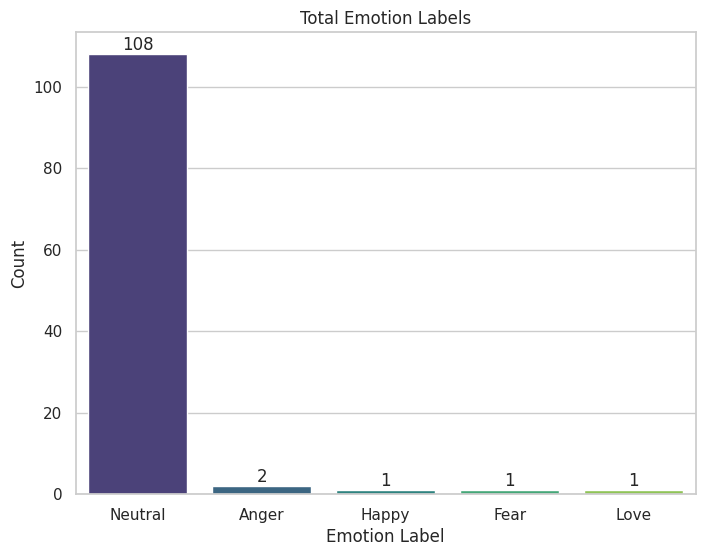

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x="emotion_label", y="count", data=emotion_label_data, palette="viridis")
plt.title("Total Emotion Labels")
plt.xlabel("Emotion Label")
plt.ylabel("Count")

# Add labels to the bars
for index, row in emotion_label_data.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.show()

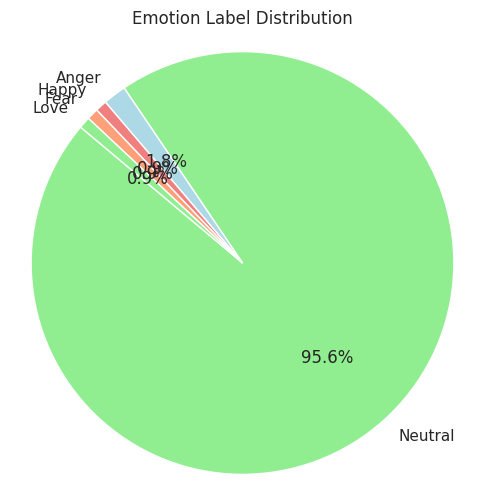

In [ ]:
# Create a Sentiment Pie Chart
plt.figure(figsize=(6, 6))
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightsalmon']

plt.pie(emotion_label_data['count'], labels=emotion_label_data['emotion_label'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title("Emotion Label Distribution")

plt.show()
